#Упражнение 2 по курсу Компьтерное зрение.
##Выполнила: Авдеева Мария




Загрузим датасет MNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Посмотрим на рандомное изображение, чтобы понять как выглядят данный. Вместе с картинкой, я вывела класс данной картинки. В данном случае картинка отнесена к классу 8

8


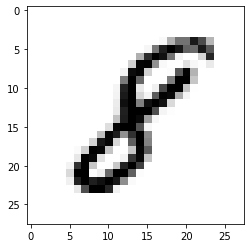

In [ ]:
image_index = 7777 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

Так как данные достаточно простые (предстовляют собой рукописные цифры) и их много, я не буду делать аугментацию, что вполне логично. Я преобразую данные в нужный размер для Keras, и произвожу нормализацию, что по идеи должно помочь повысить accuracy

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Займемся построением нейронной сети. Я буду использовать меньше слоев, чем в примере, данном на курсе, openedu, так как для этого датасета большое количество слоев - избыточно. 
1. 2d Convolution layer, который проходится по каждому изображению, и выполняет "свертку" с помощью окна(ядра) размером 3*3.
2. MaxPolling2D - выбирает максимальное значение пикселя из квадрата 2*2 и оставляет только его, наше изображение станет меньше в 4 раза
3. Flatten - слой, преобразующий 2D-данные в 1D-данные
4. Dence - скрытый слой с колвом нейронов = 128
5. Dropout - обнуляет 20% весов, чтобы избежать переобучения
6. Dense - еще один скрытый слой с 10ю нейронами, поскольку у нас есть 10 числовых классов

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Скомпилируем модель

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Натренируем на 10 эпохах

In [ ]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3501 - accuracy: 0.8975
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0876 - accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0523 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0423 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0330 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0273 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0180 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 32s 17m

Выполним предсказание и посмотрим на данные

In [ ]:
predictions=model.predict(x_test)
print(predictions[:5])
print(y_test[:5])

[[1.0459797e-12 8.7607415e-15 3.1413810e-12 5.5978028e-11 1.6552294e-17
  1.8725770e-15 2.1708861e-22 1.0000000e+00 1.6255313e-14 3.7135758e-10]
 [6.6595319e-12 5.8958536e-09 1.0000000e+00 6.6881688e-17 5.1429588e-19
  2.4236018e-21 8.8831107e-13 2.4435820e-19 1.9892205e-14 8.3151253e-23]
 [2.6158895e-13 9.9999988e-01 9.5446122e-09 4.9803762e-14 2.3902469e-08
  4.2708883e-12 3.7493768e-09 7.5393899e-08 2.8847118e-08 2.5001934e-12]
 [9.9999845e-01 2.3001502e-14 1.4686048e-06 5.9054216e-13 7.5164552e-14
  1.2038405e-11 2.6016016e-08 2.2231700e-10 1.4636563e-12 5.1032263e-09]
 [2.8572884e-12 1.3290730e-14 4.8463035e-12 7.9792232e-12 9.9998283e-01
  1.2044454e-09 2.7620343e-13 4.6362317e-10 1.8125900e-12 1.7195296e-05]]
[7 2 1 0 4]


Посмотрим на точность модели. Accuracy оказалась равной = 0,9834. Что является очень хорошим результатом

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0671 - accuracy: 0.9834


[0.06707501411437988, 0.9833999872207642]

Посмотрим на несколько картинок и на то, к каким классам отнесла их модель

8


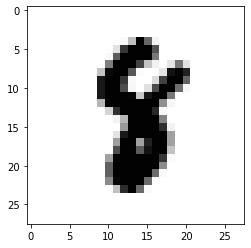

In [ ]:
image_index = 693
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
print(predictions[image_index].argmax())

5


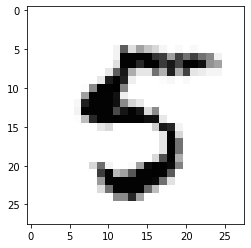

In [ ]:
image_index = 1967
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
print(predictions[image_index].argmax())

7


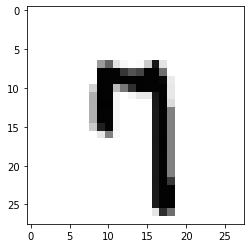

In [ ]:
image_index = 80
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
print(predictions[image_index].argmax())

Расчитаем ключевые метрики:


In [ ]:
pred = []
for i in predictions:
  pred.append(i.argmax())


[7, 2, 1, 0, 4]
[7 2 1 0 4]


In [ ]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.991     0.993     0.992       980
           1      0.994     0.996     0.995      1135
           2      0.986     0.979     0.982      1032
           3      0.991     0.976     0.984      1010
           4      0.980     0.991     0.985       982
           5      0.976     0.987     0.981       892
           6      0.982     0.984     0.983       958
           7      0.981     0.979     0.980      1028
           8      0.976     0.982     0.979       974
           9      0.976     0.968     0.972      1009

    accuracy                          0.983     10000
   macro avg      0.983     0.983     0.983     10000
weighted avg      0.983     0.983     0.983     10000

